# Text Generation with Markov Chain
    - States => Characters
    - ngram

In [12]:
import numpy as np

In [28]:
f = open('../datasets/sherlock.txt')#open('../class_04/face_recognition.py')#
text = f.read()
f.close()


In [29]:
# text[:10000]

In [30]:
# print(text[:4000])

In [31]:
text.find('In the year')

3433

In [33]:
# text[:3433]

In [34]:
blob = text[3433:]

In [ ]:
#text.split('\n')

In [35]:
blob = [each.strip() for each in blob.split('\n') if each]
blob = ' '.join(blob)

In [36]:
from nltk.tokenize import word_tokenize
len(set(word_tokenize(blob)))

21758

In [37]:
states = set(blob) # Vocab
print(len(states))

96


In [38]:
blob[:100]

'In the year 1878 I took my degree of Doctor of Medicine of the University of London, and proceeded t'

In [116]:
T = {} # Transition Matrix

n = 5

for i in range(len(blob) - n):
    ngram =  blob[i:i+n]
    next_state = blob[i+n]
    T_context = T.setdefault(ngram, {})
    T_context[next_state] = T_context.setdefault(next_state, 0) + 1

In [117]:
len(T.keys())

156388

In [45]:
# T

In [97]:
T['Sh']

{'e': 830, 'o': 107, 'a': 44, 'i': 5, 'u': 1, 'l': 11}

In [118]:
# Converting to probabilities
for row in T:
    s = sum(T[row].values())
    for val in T[row]:
        T[row][val] = T[row][val]/s

In [100]:
# T['I']

In [ ]:
# T['In the yea']

In [142]:
values = []
for _ in range(10000):
    r = np.random.random()
    if r <= 0.3:
        values.append(0.3)
    elif r <= 0.7:
        values.append(0.7)
    else:
        values.append(1)
        
values = np.array(values)

for f in [0.3, 0.7, 1]:
    print((values==f).sum()/values.shape[0])

0.3023
0.4041
0.2936


In [143]:
np.random.choice([1,2,3,4], p=[0.1,0.2,0.3,0.4])

3

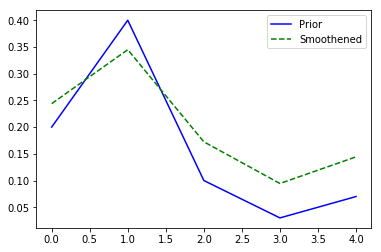

In [149]:
def temperature_sampling(probabilities, temp=1):
    probabilities = np.asarray(probabilities)
    smoothened_probs = np.exp(np.log(probabilities) / temp)
    return list(smoothened_probs / smoothened_probs.sum())


probs = [0.2, 0.4, 0.1, 0.03, 0.07]
sampled = temperature_sampling(probs, 2)

from matplotlib import pyplot as plt
plt.figure()

plt.plot(probs, 'b-', label='Prior')
plt.plot(sampled, 'g--', label='Smoothened')
plt.legend()
plt.show()

In [150]:
def predict_state(ngram, diversity=1):
    if T.get(ngram) is None:
        return ' '
    mapped_ngram = T[ngram]
    mapped_states = list(mapped_ngram.keys())
    probabilities = list(mapped_ngram.values())
    diversified_probs = temperature_sampling(probabilities, temp=diversity)
#     print(sorted(probabilities, reverse=True)[:4])
    return np.random.choice(mapped_states, p=diversified_probs)

In [121]:
predict_state('t')

' '

In [85]:
n

1

In [153]:
def generate(initial=None, size=1000, diversity=1):
    sentence = ''
    if initial is None:
        initial = int(np.random.random() * (len(data) - n))
        initial = data[initial:initial+n]
    
    sentence += initial
    for i in range(size):
        pred = predict_state(initial, diversity=diversity)
        sentence += pred
        initial = sentence[-n:]

    return sentence

In [155]:
print(generate('In th', diversity=0.5))

In the police have to see that he same a case I see the matter which led up the other side the first, and so much in your side of the can assure was a proud to make the man who had read it was a windows of news that she said he. "I have already to be at the case for the time that the boy at the man of wooden straight of the could be left the man who are not approached the for a little should not been more could see by the table to you must have been suddenly that you can sprang of the prison of his hand uncle good deal of the top of a beautiful with a glimpse of the state of the door was full at the deceased expression to me that the disting a curtain was the started for help your hand. "What it was death?" "Well, well these the moor. "When I see the palm of some of the could not go to the other in the other heard the door and he was a long and he had been or a quietly. We can be of the body story. "I must be most importance of the back to my surprised his dead of the same to the stron

In [156]:
print(generate('In th', diversity=2))

In that He Can you name was cut it" provision, suns, 'would fly. Swiftly. But everythings--the ups in Hark that's my future heir very curiosity." "Hum! A door slinking pose a square-taking away it chapleton exclaimant, by evening. Briarbrae than mystery, understan's view-hall, in front organizations?" "America. Now your leisure I trustworth Walsham, Wilson, you damning narrated still do very hunted Jacob Shafterwards, it is apostolid sank he had. Had I began only wish you supposed, of bright o' his of Irene's face." We pulled," I and amusing.' "I look, and visiting?" I spear-hearts if he met you quit that I journed it." As I fear," I sat over sleeve of whither such." There's noses. It's figure is a painless whatever. Nevilles August now, whence, rigid an earth you? Well, Doctor; "Mr. Jonathan butler's-earth--" Holmes knobs upon a settee animosity. The Lone Stewarded shutterly. "I see you. Sit down Regent nose old-fashion these initials all guest." THE ADVENTURES OF SHERLOCK HOLMES THE 